In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
def hist_show(d, b = 50):
    plt.hist(d, bins = b)
    plt.show()
    
    
def mm_scaler(d):
    d = np.array(d).reshape(-1, 1)
    d =MinMaxScaler().fit_transform(d).flatten()
    return d


def standard_scaler(d):
    d = np.array(d).reshape(-1, 1)
    d =StandardScaler().fit_transform(d).flatten()
    return d

In [3]:
# Загрузка и анализ набора данных
museum_dataset = pd.read_csv('Набор_1_музеи_России.csv',  sep=';')
museum_dataset.head(10)

,name,base_fond,science_fond,ams,n_buildings,n_days,guests,employees
0,Курганинский исторический музей,23093,4111,0,1,308,17.8,18
1,Таманский музейный комплекс,16451,5476,14625,7,314,102.2,40
2,Музей истории и краеведения г.Лабинска,21181,2016,0,1,247,28.3,18
3,Дом-музей А.Киселева г.Туапсе,3846,1196,5042,1,360,54.4,10
4,Красногвардейский историко-краеведческий музей,10778,6650,3183,2,247,7.9,5
5,Гиагинский районный краеведческий музей им.П....,17276,5434,4265,1,254,10.2,3
6,Краснодарский выставочный зал ИЗО,641,170,0,1,302,131.4,29
7,Краеведческий музей г.Адыгейска,3784,630,3784,1,254,2.7,2
8,Алтайский гос.мемориальный музей Г.С.Титова,7668,2430,1234,3,310,19.8,20
9,Колыванский музей истории камнерезного дела на...,1517,942,0,1,265,5.8,3


In [4]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pd.DataFrame()

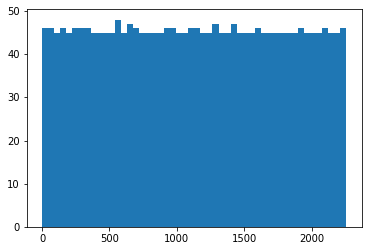

In [5]:
# обработка колонки "name"
data = museum_dataset['name']
data = pd.factorize(data)

hist_show(data[0])

In [6]:
dataset['name'] = mm_scaler(data[0])
dataset.head(10)

,name
0,0.000000
1,0.000443
2,0.000886
3,0.001329
4,0.001772
5,0.002215
6,0.002658
7,0.003101
8,0.003545
9,0.003988


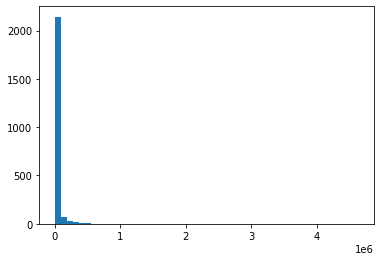

In [7]:
# обработка колонки "base_fond"
data = museum_dataset['base_fond']

hist_show(data)

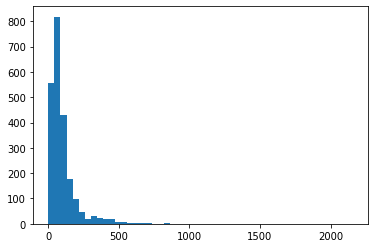

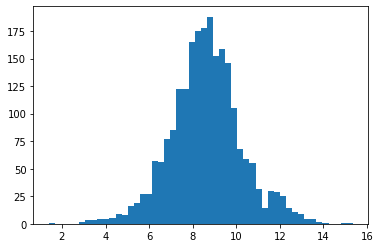

In [8]:
hist_show(data**0.5)
hist_show(np.log(data))

In [9]:
dataset['base_fond'] = standard_scaler(data) 
dataset.head(10)

,name,base_fond
0,0.000000,-0.024498
1,0.000443,-0.073177
2,0.000886,-0.038511
3,0.001329,-0.165559
4,0.001772,-0.114754
5,0.002215,-0.067130
6,0.002658,-0.189048
7,0.003101,-0.166013
8,0.003545,-0.137547
9,0.003988,-0.182628


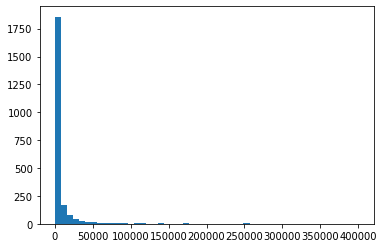

In [10]:
data = museum_dataset['science_fond']
hist_show(data)

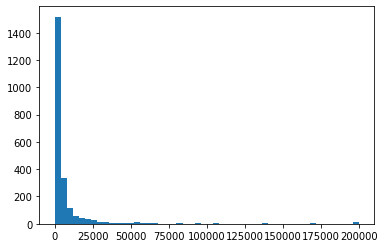

In [11]:
data = np.clip(data, 0, 200000)
hist_show(data)

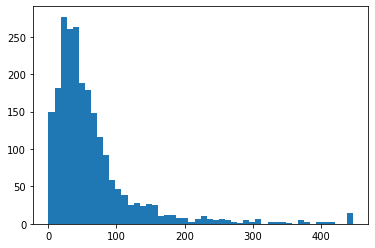

In [12]:
hist_show(data**0.5)

In [13]:
dataset['science_fond'] = mm_scaler(data**0.5)
dataset.head(10)

,name,base_fond,science_fond
0,0.000000,-0.024498,0.143370
1,0.000443,-0.073177,0.165469
2,0.000886,-0.038511,0.100399
3,0.001329,-0.165559,0.077330
4,0.001772,-0.114754,0.182346
5,0.002215,-0.067130,0.164833
6,0.002658,-0.189048,0.029155
7,0.003101,-0.166013,0.056125
8,0.003545,-0.137547,0.110227
9,0.003988,-0.182628,0.068629


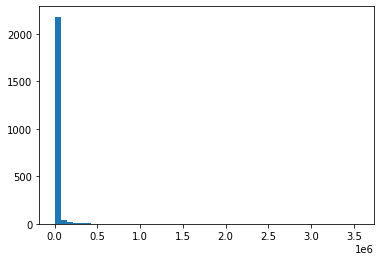

In [14]:
data = museum_dataset['ams']
hist_show(data)

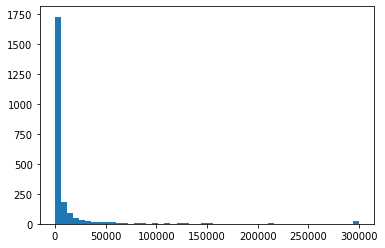

In [15]:
data = np.clip(data, 0, 300000)
hist_show(data)

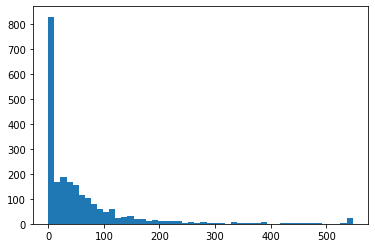

In [16]:
hist_show(data**0.5)

In [17]:
dataset['ams'] = mm_scaler(data**0.5)
dataset.head(10)

,name,base_fond,science_fond,ams
0,0.000000,-0.024498,0.143370,0.000000
1,0.000443,-0.073177,0.165469,0.220794
2,0.000886,-0.038511,0.100399,0.000000
3,0.001329,-0.165559,0.077330,0.129641
4,0.001772,-0.114754,0.182346,0.103005
5,0.002215,-0.067130,0.164833,0.119234
6,0.002658,-0.189048,0.029155,0.000000
7,0.003101,-0.166013,0.056125,0.112309
8,0.003545,-0.137547,0.110227,0.064135
9,0.003988,-0.182628,0.068629,0.000000


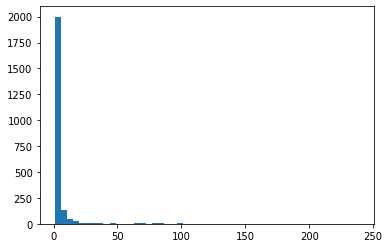

In [18]:
data = museum_dataset['n_buildings']
hist_show(data)

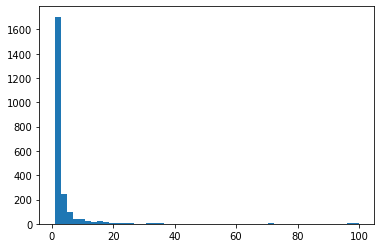

In [19]:
data = np.clip(data, 0, 100)
hist_show(data)

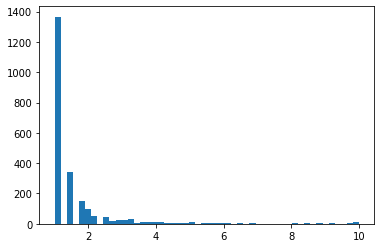

In [20]:
hist_show(data**0.5)

In [21]:
dataset['n_buildings'] = mm_scaler(data)
dataset.head(10)

,name,base_fond,science_fond,ams,n_buildings
0,0.000000,-0.024498,0.143370,0.000000,0.000000
1,0.000443,-0.073177,0.165469,0.220794,0.060606
2,0.000886,-0.038511,0.100399,0.000000,0.000000
3,0.001329,-0.165559,0.077330,0.129641,0.000000
4,0.001772,-0.114754,0.182346,0.103005,0.010101
5,0.002215,-0.067130,0.164833,0.119234,0.000000
6,0.002658,-0.189048,0.029155,0.000000,0.000000
7,0.003101,-0.166013,0.056125,0.112309,0.000000
8,0.003545,-0.137547,0.110227,0.064135,0.020202
9,0.003988,-0.182628,0.068629,0.000000,0.000000


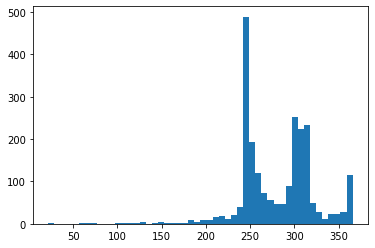

In [22]:
data = museum_dataset['n_days']
hist_show(data)

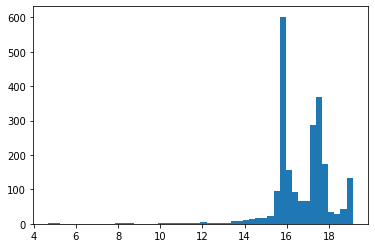

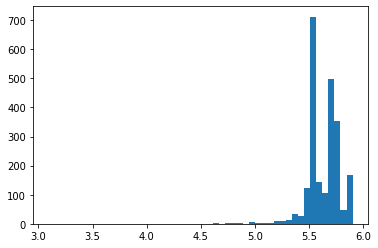

In [23]:
hist_show(data**0.5)
hist_show(np.log(data))

In [24]:
dataset['n_days'] = mm_scaler(np.log(data))
dataset.head(10)

,name,base_fond,science_fond,ams,n_buildings,n_days
0,0.000000,-0.024498,0.143370,0.000000,0.000000,0.938635
1,0.000443,-0.073177,0.165469,0.220794,0.060606,0.945497
2,0.000886,-0.038511,0.100399,0.000000,0.000000,0.860134
3,0.001329,-0.165559,0.077330,0.129641,0.000000,0.994121
4,0.001772,-0.114754,0.182346,0.103005,0.010101,0.860134
5,0.002215,-0.067130,0.164833,0.119234,0.000000,0.870074
6,0.002658,-0.189048,0.029155,0.000000,0.000000,0.931638
7,0.003101,-0.166013,0.056125,0.112309,0.000000,0.870074
8,0.003545,-0.137547,0.110227,0.064135,0.020202,0.940937
9,0.003988,-0.182628,0.068629,0.000000,0.000000,0.885153


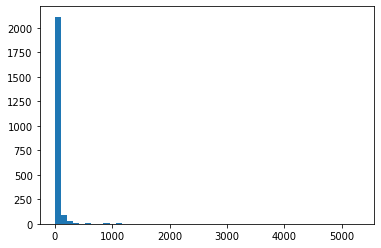

In [25]:
data = museum_dataset['guests']
hist_show(data)

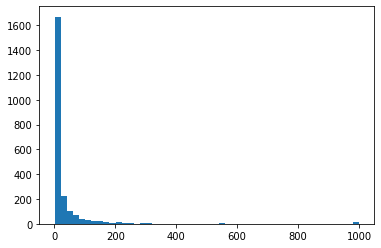

In [26]:
data = np.clip(data, 1, 1000)
hist_show(data)

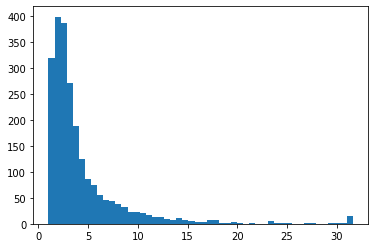

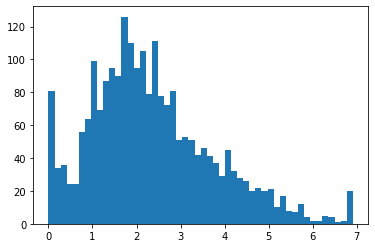

In [27]:
hist_show(data**0.5)
hist_show(np.log(data))

In [28]:
dataset['guests'] = mm_scaler(np.log(data))
dataset.head(10)

,name,base_fond,science_fond,ams,n_buildings,n_days,guests
0,0.000000,-0.024498,0.143370,0.000000,0.000000,0.938635,0.416807
1,0.000443,-0.073177,0.165469,0.220794,0.060606,0.945497,0.669817
2,0.000886,-0.038511,0.100399,0.000000,0.000000,0.860134,0.483929
3,0.001329,-0.165559,0.077330,0.129641,0.000000,0.994121,0.578533
4,0.001772,-0.114754,0.182346,0.103005,0.010101,0.860134,0.299209
5,0.002215,-0.067130,0.164833,0.119234,0.000000,0.870074,0.336200
6,0.002658,-0.189048,0.029155,0.000000,0.000000,0.931638,0.706198
7,0.003101,-0.166013,0.056125,0.112309,0.000000,0.870074,0.143788
8,0.003545,-0.137547,0.110227,0.064135,0.020202,0.940937,0.432222
9,0.003988,-0.182628,0.068629,0.000000,0.000000,0.885153,0.254476


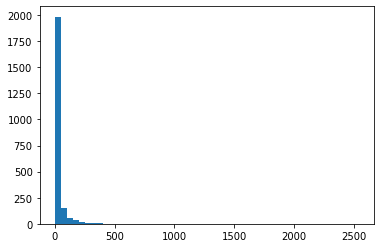

In [29]:
data = museum_dataset['employees']
hist_show(data)

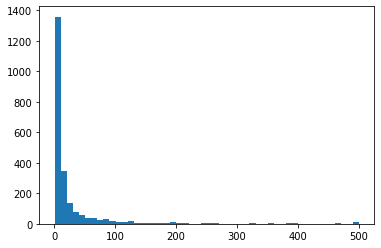

In [30]:
data = np.clip(data, 0, 500)
hist_show(data)

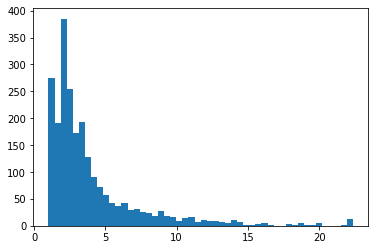

In [31]:
hist_show(data**0.5)

In [32]:
dataset['employees'] = data
dataset.head(10)

,name,base_fond,science_fond,ams,n_buildings,n_days,guests,employees
0,0.000000,-0.024498,0.143370,0.000000,0.000000,0.938635,0.416807,18
1,0.000443,-0.073177,0.165469,0.220794,0.060606,0.945497,0.669817,40
2,0.000886,-0.038511,0.100399,0.000000,0.000000,0.860134,0.483929,18
3,0.001329,-0.165559,0.077330,0.129641,0.000000,0.994121,0.578533,10
4,0.001772,-0.114754,0.182346,0.103005,0.010101,0.860134,0.299209,5
5,0.002215,-0.067130,0.164833,0.119234,0.000000,0.870074,0.336200,3
6,0.002658,-0.189048,0.029155,0.000000,0.000000,0.931638,0.706198,29
7,0.003101,-0.166013,0.056125,0.112309,0.000000,0.870074,0.143788,2
8,0.003545,-0.137547,0.110227,0.064135,0.020202,0.940937,0.432222,20
9,0.003988,-0.182628,0.068629,0.000000,0.000000,0.885153,0.254476,3


In [33]:
dataset.to_csv('prepared_data.csv', index=False)